In [92]:
### import os
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data')
PLOTS = os.path.join(DIR, '../Plots')

sns.set_style('whitegrid')

def dh(data, reference):
    tmp = np.diff(data['h[cm]'])
    tmp = [reference - diff for diff in tmp]
    tmp.insert(0, reference)
    data['dp[Torr]'] = (tmp - data['h[cm]'])*10
    

p0 = 753.8

data = pd.read_csv(os.path.join(DATA, 'aufg4.csv'), comment='#', engine='python')
data_rev = pd.read_csv(os.path.join(DATA, 'aufg4_rev.csv'), comment='#', engine='python')

dh(data, 32.955)
dh(data_rev, 33.745)

data_ges = (data + data_rev.iloc[::-1]) / 2

data = data.append(data_rev, ignore_index=True)

data['T[K]'] = data['T[C]'] + 273.15
data_ges['T[K]'] = data['T[C]'] + 273.15


data = data.drop(1)
data_ges

,T[C],h[cm],dp[Torr],T[K]
0,9.25,27.9100,54.400,273.45
1,9.00,29.4425,23.750,275.95
2,8.90,27.6825,74.275,279.25
3,9.15,27.5700,58.925,282.35
4,9.10,27.5550,58.100,285.15
5,9.20,27.3450,62.150,288.45
6,9.50,27.5400,56.150,292.15
7,NaN,NaN,NaN,294.05


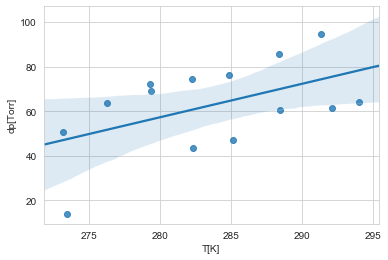

In [93]:
sns.regplot(x='T[K]', y='dp[Torr]', data=data)
plt.savefig(os.path.join(PLOTS, 'aufg4_1.png'), dpi=200)

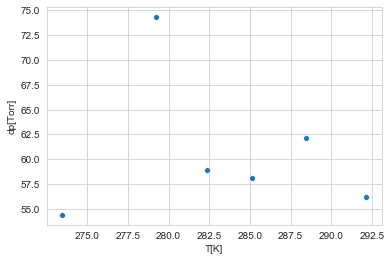

In [91]:
sns.scatterplot(x='T[K]', y='dp[Torr]', data=data_ges[:-1])